## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [36]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [37]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [38]:
data_matrix = np.column_stack((X, y))
np.random.seed(42)
np.random.shuffle(data_matrix)
data_matrix

array([[  5.30612245,  -3.30612245],
       [ 15.91836735, -13.91836735],
       [ 12.24489796, -10.24489796],
       [ 18.36734694, -16.36734694],
       [  6.93877551,  -4.93877551],
       [ 19.59183673, -17.59183673],
       [ 10.6122449 ,  -8.6122449 ],
       [ 10.20408163,  -8.20408163],
       [ 13.06122449, -11.06122449],
       [  7.75510204,  -5.75510204],
       [  4.89795918,  -2.89795918],
       [  1.63265306,   0.36734694],
       [ 15.10204082, -13.10204082],
       [  3.26530612,  -1.26530612],
       [  1.2244898 ,   0.7755102 ],
       [  2.44897959,  -0.44897959],
       [ 16.73469388, -14.73469388],
       [ 18.7755102 , -16.7755102 ],
       [ 19.18367347, -17.18367347],
       [  6.12244898,  -4.12244898],
       [  3.67346939,  -1.67346939],
       [  6.53061224,  -4.53061224],
       [  9.79591837,  -7.79591837],
       [ 13.87755102, -11.87755102],
       [ 12.65306122, -10.65306122],
       [  0.        ,   2.        ],
       [ 17.95918367, -15.95918367],
 

In [39]:
X=data_matrix[:,0]
y=data_matrix[:,1]
y

array([ -3.30612245, -13.91836735, -10.24489796, -16.36734694,
        -4.93877551, -17.59183673,  -8.6122449 ,  -8.20408163,
       -11.06122449,  -5.75510204,  -2.89795918,   0.36734694,
       -13.10204082,  -1.26530612,   0.7755102 ,  -0.44897959,
       -14.73469388, -16.7755102 , -17.18367347,  -4.12244898,
        -1.67346939,  -4.53061224,  -7.79591837, -11.87755102,
       -10.65306122,   2.        , -15.95918367,  -9.02040816,
       -11.46938776,  -0.04081633,  -9.83673469,  -2.48979592,
       -12.69387755,   1.59183673,  -6.57142857,   1.18367347,
       -15.55102041, -12.28571429,  -7.3877551 , -14.32653061,
        -2.08163265,  -6.97959184,  -5.34693878, -18.        ,
        -6.16326531,  -0.85714286, -15.14285714,  -3.71428571,
        -9.42857143, -13.51020408])

In [15]:
len(y)

50

### Plot X vs. y

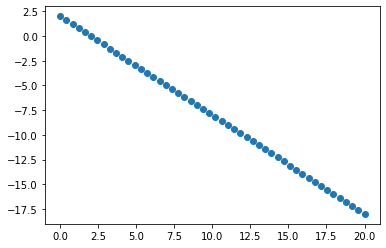

In [40]:
plt.scatter(X,y)

ones_column = np.ones((X.shape[0], 1))  # Create a column of ones with the same number of rows
XX=X
# Concatenate the column of ones with the existing array
array_with_ones = np.c_[ones_column, X]
X=array_with_ones
X

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

num_iterations = 20
theta_0=0
theta_1=0
alpha=.01
h_x = np.empty_like(x)
appended_list = []
gradient = np.zeros((2, 1))
theta = np.zeros((2, 1))
for iteration in range(num_iterations):

    print('****** iteration****',iteration)
    h_x= x*theta[1,0] + theta[0,0]
    
    print('h_x:',h_x)
    error_vector=(h_x - y)
    print('error',error_vector)
    cost = (1/(2*len(x))) * np.square(h_x - y).sum()
    appended_list.append(cost)
    print('J:',cost)
    gradient_theta_0 = (1/len(x)) * (h_x - y).sum()
    gradient_theta_1 = (1/len(x)) * ((h_x - y) * x).sum()
    gradient[0,0]=gradient_theta_0
    gradient[1,0]=gradient_theta_1
    print(' gradiant vector>>>>>>>',gradient)
    print(' gradiant vector NORM >>>>>>>',np.linalg.norm(gradient))
    print('gradiant',gradient_theta_0,gradient_theta_1)
    
   ## theta_0 -= alpha * gradient_theta_0
    ##theta_1 -= alpha * gradient_theta_1
    theta[0,0]-=alpha * gradient_theta_0
    theta[1,0]-=alpha * gradient_theta_1
    print('thetas',theta)
    
    if np.linalg.norm(gradient)<.001:
        print('reach to minimum theta')
        break   

def gradient_descent(X, y,  alpha, iterations):
    
    num_iterations = iterations
    theta_0=0
    theta_1=0
    alpha
    m = len(y)
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    cost=0
    gradient = np.zeros((2, 1))
    for iteration in range(num_iterations):
        print('****** iteration****',iteration)
        print('thetas epoch>>>>>>>>>',theta_0,theta_1)
        print('cost>>>>>>>>>',cost)
        print(gradient)

        for i in range(m):


           # print('****** iteration****',iteration,i)
            h_x= XX[i]*theta_1 + theta_0

           # print('h_x:',h_x)
            cost = (1/2) * np.square(h_x - y[i])
           # print('cost>>',cost)      
            cost_list.append(cost)

            gradient_theta_0 =  (h_x - y[i])
            gradient_theta_1 = ((h_x - y[i]) * XX[i])
            #print('gradient',gradient_theta_0,gradient_theta_1)
            gradient[0,0]=gradient_theta_0
            gradient[1,0]=gradient_theta_1
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            theta_0 -= alpha * gradient_theta_0
            theta_1 -= alpha * gradient_theta_1
        if np.linalg.norm(gradient)<.2:
            print('reach to smallest gradient')
            print('cost>>>>>>>>>',cost)
            print(gradient)
            break
        if cost<.1:
            print('reach to smallest cost')
            print('cost>>>>>>>>>',cost)
            print(gradient)
            break   

            #print('thetas',theta_0,theta_1)
    return cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list

def momentum_gradient_descent(X, y, theta, alpha,momentum, iterations):
    m = len(y)
    cost_list = []
    velocity = np.zeros((X.shape[1], 1))
  #  gradient = np.zeros((2, 1))
    theta_0 = []
    theta_1 = []
    hx=[]
    for _ in range(iterations):
       # error = X.dot(theta) - y
        error=theta.T.dot(X.T) - y
        cost=1/(m*2)*(error.dot(error.T))
        gradient = (1 / m) * X.T.dot(error.T)
        ypredict=X@theta
        hx.append(ypredict)
        cost_list.append(cost[0,0])
        velocity = momentum * velocity + alpha * gradient #velocity
        # velocity = beta * velocity + (1 - beta) * gradient
        theta -= velocity
       # theta -= alpha * gradient
        theta_0.append(theta[0,0])
        theta_1.append(theta[1,0])
       
        if np.linalg.norm(gradient) < 0.3:
            print('reach to small gradient')
            break
        if cost<.2:
            print('reach to small cost')
            break
        
    return cost_list,error,theta,gradient,theta_0,theta_1,hx

In [ ]:
def momentum_gradient_descent_upgrade(X, y, theta, alpha,momentum, iterations):
    m = len(y)
    velocity = np.zeros((X.shape[1], 1))
  #  gradient = np.zeros((2, 1))
    theta_0 = []
    theta_1 = []
    hx=[]
    for _ in range(iterations):
       # error = X.dot(theta) - y
        error=theta.T.dot(X.T) - y
        cost=1/(m*2)*(error.dot(error.T))
        gradient = (1 / m) * X.T.dot(error.T)
        ypredict=X@theta
        hx.append(ypredict)
        cost_list.append(cost[0,0])
        velocity = momentum * velocity + alpha * gradient #velocity
        # velocity = beta * velocity + (1 - beta) * gradient
        theta -= velocity
       # theta -= alpha * gradient
        theta_0.append(theta[0,0])
        theta_1.append(theta[1,0])
       
        if np.linalg.norm(gradient) < 0.3:
            print('reach to small gradient')
            break
        if cost<.2:
            print('reach to small cost')
            break
        
    return cost_list,error,theta,gradient,theta_0,theta_1,hx

# class

In [ ]:
import numpy as np

class MiniBatchMomentumGradientDescent:
    def __init__(self, alpha, momentum, iterations, batch_size):
        self.alpha = alpha
        self.momentum = momentum
        self.iterations = iterations
        self.batch_size = batch_size
        self.theta = None
        self.velocity = None
        self.cost_list = []
        self.cost_list_batch = []
        self.theta_0 = []
        self.theta_1 = []
        self.theta_0_batch = []
        self.theta_1_batch = []
        self.hx = []
        self.gradient = None

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(y.shape[0], 1)
        self.theta = np.zeros((X.shape[1], 1))
        self.velocity = np.zeros((X.shape[1], 1))
        m = y.shape[0]
        num_batches = int(m / self.batch_size)

        for j in range(self.iterations):
            for i in range(num_batches):
                start_index = i * self.batch_size
                end_index = min((i + 1) * self.batch_size, m)
                X_batch = X[start_index:end_index]
                y_batch = y[start_index:end_index]
                h_x = np.dot(X_batch, self.theta)
                error = h_x - y_batch
                cost = np.mean(error ** 2) / 2
                gradient = (1 / len(y_batch)) * X_batch.T.dot(error)
                self.hx.append(np.dot(X, self.theta))
                self.cost_list.append(cost)
                self.velocity = self.momentum * self.velocity + self.alpha * gradient
                self.theta -= self.alpha * gradient
                self.theta_0.append(self.theta[0, 0])
                self.theta_1.append(self.theta[1, 0])
            self.theta_0_batch.append(self.theta[0, 0])
            self.theta_1_batch.append(self.theta[1, 0])
            self.cost_list_batch.append(cost)
            if np.linalg.norm(gradient) < 0.001:
                print('Reached small gradient')
                break
            if j != 0 and abs(self.cost_list_batch[-1] - self.cost_list_batch[-2]) < 0.001:
                print('Reached small cost')
                break

        return self

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta)


# end class

In [75]:
import pandas as pd
import numpy as np
df=pd.read_csv('Dummy Data HSS.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [77]:
df = df.drop('Influencer', axis=1)

In [78]:
df = df.dropna()


In [84]:
df = df.iloc[:150]
df.head()

TV      Radio  Social Media       Sales
0  16.0   6.566231      2.907983   54.732757
1  13.0   9.237765      2.409567   46.677897
2  41.0  15.886446      2.913410  150.177829
3  83.0  30.020028      6.922304  298.246340
4  15.0   8.437408      1.405998   56.594181

In [91]:
columns_to_normalize = df[['TV','Radio','Social Media']]

In [92]:
columns_to_normalize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 156
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            150 non-null    float64
 1   Radio         150 non-null    float64
 2   Social Media  150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [88]:
#df_normalized = columns_to_normalize.apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())


In [89]:
df_normalized

TV     Radio  Social Media
0    0.066667  0.135208      0.290646
1    0.033333  0.192183      0.240776
2    0.344444  0.333976      0.291189
3    0.811111  0.635396      0.692308
4    0.055556  0.175114      0.140362
..        ...       ...           ...
152  0.155556  0.248670      0.155592
153  0.344444  0.181039      0.017839
154  0.633333  0.385548      0.489479
155  0.455556  0.507158      0.415121
156  1.000000  0.778585      0.736074

[150 rows x 3 columns]

In [94]:
df[columns_to_normalize.columns] = scaler.fit_transform(df[columns_to_normalize.columns])


In [95]:
df

TV     Radio  Social Media       Sales
0    0.066667  0.135208      0.290646   54.732757
1    0.033333  0.192183      0.240776   46.677897
2    0.344444  0.333976      0.291189  150.177829
3    0.811111  0.635396      0.692308  298.246340
4    0.055556  0.175114      0.140362   56.594181
..        ...       ...           ...         ...
152  0.155556  0.248670      0.155592   82.549072
153  0.344444  0.181039      0.017839  144.592087
154  0.633333  0.385548      0.489479  234.021177
155  0.455556  0.507158      0.415121  183.327735
156  1.000000  0.778585      0.736074  354.103970

[150 rows x 4 columns]

In [96]:
np_data=df.values

In [97]:
np_data

array([[6.66666667e-02, 1.35208121e-01, 2.90646402e-01, 5.47327571e+01],
       [3.33333333e-02, 1.92182650e-01, 2.40776397e-01, 4.66778970e+01],
       [3.44444444e-01, 3.33975913e-01, 2.91189452e-01, 1.50177829e+02],
       [8.11111111e-01, 6.35396093e-01, 6.92307651e-01, 2.98246340e+02],
       [5.55555556e-02, 1.75113819e-01, 1.40362210e-01, 5.65941808e+01],
       [2.11111111e-01, 2.00214591e-01, 1.02457120e-01, 1.05889148e+02],
       [5.00000000e-01, 5.26071708e-01, 4.27286287e-01, 1.98679825e+02],
       [2.33333333e-01, 3.65295957e-01, 2.28798336e-01, 1.08733932e+02],
       [7.33333333e-01, 5.20848560e-01, 7.13100713e-01, 2.70189400e+02],
       [3.33333333e-02, 4.36770050e-03, 2.22751696e-01, 4.82805822e+01],
       [5.77777778e-01, 5.14371493e-01, 5.15124497e-01, 2.24961019e+02],
       [3.55555556e-01, 3.32288802e-01, 3.19356967e-01, 1.45543992e+02],
       [6.00000000e-01, 4.26831127e-01, 3.92020752e-01, 2.29632381e+02],
       [2.66666667e-01, 0.00000000e+00, 2.37088135e

In [98]:
X = np_data[:, :3]
X

array([[0.06666667, 0.13520812, 0.2906464 ],
       [0.03333333, 0.19218265, 0.2407764 ],
       [0.34444444, 0.33397591, 0.29118945],
       [0.81111111, 0.63539609, 0.69230765],
       [0.05555556, 0.17511382, 0.14036221],
       [0.21111111, 0.20021459, 0.10245712],
       [0.5       , 0.52607171, 0.42728629],
       [0.23333333, 0.36529596, 0.22879834],
       [0.73333333, 0.52084856, 0.71310071],
       [0.03333333, 0.0043677 , 0.2227517 ],
       [0.57777778, 0.51437149, 0.5151245 ],
       [0.35555556, 0.3322888 , 0.31935697],
       [0.6       , 0.42683113, 0.39202075],
       [0.26666667, 0.        , 0.23708813],
       [0.28888889, 0.07835087, 0.00572577],
       [0.55555556, 0.4719004 , 0.09381603],
       [0.16666667, 0.20643043, 0.18511041],
       [1.        , 0.76540393, 0.36732146],
       [0.91111111, 0.86395163, 0.46360318],
       [0.4       , 0.26591543, 0.38836225],
       [0.75555556, 0.75371982, 0.28308882],
       [0.3       , 0.05550539, 0.45561236],
       [0.

In [70]:
y = np_data[:, 3]  
y

array([0.06841014, 0.04355063, 0.36297976, 0.81995974, 0.074155  ,
       0.22629277, 0.51267021, 0.23507255, 0.73336834, 0.04849696,
       0.59378117, 0.34867847, 0.60819827, 0.27396728, 0.28072527,
       0.55613905, 0.17669874, 0.99142786, 0.91595581, 0.40005673,
       0.75254008, 0.29602871, 0.97925849, 0.73972824, 0.49348001,
       0.19808492, 0.13711112, 0.32937321, 0.62430443, 0.89645563,
       0.02538575, 0.79690908, 0.36436447, 0.39880314, 0.37971159,
       0.71124373, 0.76851958, 0.61448707, 0.35844028, 0.80979378,
       0.64891394, 0.98515788, 0.18318724, 0.        , 0.2552217 ,
       0.21389815, 0.24484301, 0.22155076, 0.9067932 , 0.82762663,
       0.68696857, 0.39859307, 0.02178555, 0.42109518, 0.05685428,
       0.11698489, 0.08031493, 0.63331987, 0.89358019, 0.45835113,
       0.34983647, 0.60490296, 0.79136818, 0.05323467, 0.82259144,
       0.9838827 , 0.0692649 , 0.58803492, 0.66222973, 0.7473112 ,
       0.79196544, 0.41809663, 0.51156438, 0.97889962, 0.41223

In [99]:
len(y)

150

In [204]:
def mini_batch_momentum_gradient_descent_upgrade(X, y,alpha,momentum, iterations, batch_size):
    X=np.c_[np.ones((X.shape[0], 1)), X]
    y=y.reshape(y.shape[0], 1)
    # m = len(y)
    theta = np.zeros((X.shape[1], 1))
    velocity = np.zeros((X.shape[1], 1))
    m= y.shape[0]
    cost_list = []
    cost_list_batch = []
    theta_0 = []
    theta_all=[]
    theta_1 = []
    theta_0_batch = []
    theta_1_batch = []
    hx=[]
    gradient = np.zeros((X.shape[1], 1))
   # cost=0
    num_batches = int(m/batch_size)
    for j in range(iterations):
        
        
        for i in range(num_batches):
            start_index = i * batch_size
            end_index = min((i + 1) * batch_size, m)
            X_batch = X[start_index:end_index]
            y_batch = y[start_index:end_index]
            h_x = np.dot(X_batch, theta)
            error= h_x - y_batch
           # error=theta.T.dot(X_batch.T) - y_batch
            #error = X_batch.dot(theta) - y_batch
            cost=np.mean(error**2)/2
           # cost=1/(batch_size*2)*(error**2)
            
            gradient = (1 /len(y_batch) ) * X_batch.T.dot(error)
            #gradient = (1 /batch_size ) * X_batch.T.dot(error)
            ypredict=X@theta
            hx.append(ypredict)
           # gradient = (1 / batch_size) * X_batch.T.dot(error)
            
            cost_list.append(cost)
            velocity = momentum * velocity + alpha * gradient 
            theta -= velocity
            theta_0.append(theta[0,0])
            theta_1.append(theta[1,0])
            theta_all.append(theta.copy()) ##
        theta_0_batch.append(theta[0,0])
        theta_1_batch.append(theta[1,0])   
        cost_list_batch.append(cost)
        if np.linalg.norm(gradient) < 0.001:
            print('reach to small gradient')
            break
        if j !=0 and abs(cost_list_batch[-1]-cost_list_batch[-2])<.001:
            print('reach to small cost')
            break         
       # if np.linalg.norm(gradient) < 0.2:
          #  print('small gradient')
          #  break
       # if cost<.1:
          #  print('small cost')
           # break
    
    return cost_list,error,theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch,theta_all

In [207]:

momentum=0
batch_size=150
alpha = .9 #Learning rate
iterations = 100 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch,theta_all= mini_batch_momentum_gradient_descent_upgrade(X, y,alpha,momentum, iterations,batch_size)


reach to small cost


In [212]:
print(theta_all)

[array([[0.44323063],
       [0.29799679],
       [0.23096574],
       [0.19077326]]), array([[0.21444507],
       [0.22288076],
       [0.162132  ],
       [0.12206683]]), array([[0.27062655],
       [0.29971958],
       [0.21580611],
       [0.16005934]]), array([[0.21141415],
       [0.30941715],
       [0.21573955],
       [0.1518822 ]]), array([[0.20379729],
       [0.34387446],
       [0.235832  ],
       [0.16159056]]), array([[0.17766791],
       [0.36497805],
       [0.24540955],
       [0.16255882]]), array([[0.16204422],
       [0.38892782],
       [0.25748609],
       [0.16604829]]), array([[0.14454002],
       [0.40919802],
       [0.26679787],
       [0.1674724 ]]), array([[0.13009841],
       [0.4287387 ],
       [0.27570422],
       [0.16885689]])]


In [213]:
result_array = np.concatenate(theta_all, axis=1).T

print(result_array)
print("Shape:", result_array.shape)

[[0.44323063 0.29799679 0.23096574 0.19077326]
 [0.21444507 0.22288076 0.162132   0.12206683]
 [0.27062655 0.29971958 0.21580611 0.16005934]
 [0.21141415 0.30941715 0.21573955 0.1518822 ]
 [0.20379729 0.34387446 0.235832   0.16159056]
 [0.17766791 0.36497805 0.24540955 0.16255882]
 [0.16204422 0.38892782 0.25748609 0.16604829]
 [0.14454002 0.40919802 0.26679787 0.1674724 ]
 [0.13009841 0.4287387  0.27570422 0.16885689]]
Shape: (9, 4)


In [192]:
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,hx[-1])

0.8656406395849797

In [198]:
print(theta)

[[0.00466245]
 [0.63068647]
 [0.32780918]
 [0.13607952]]


In [111]:
# stocasted

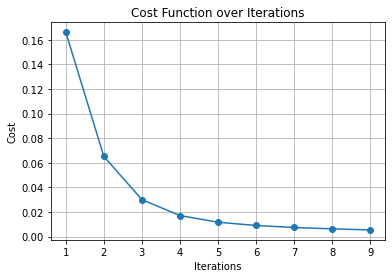

In [153]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

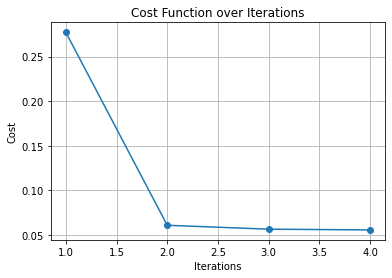

In [56]:
plt.plot(range(1, len(cost_list_batch) + 1), cost_list_batch, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

In [ ]:
# batch

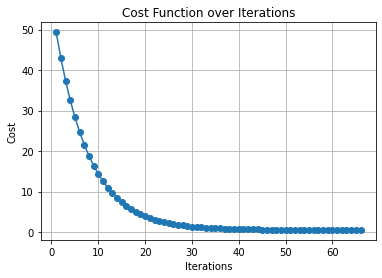

In [50]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

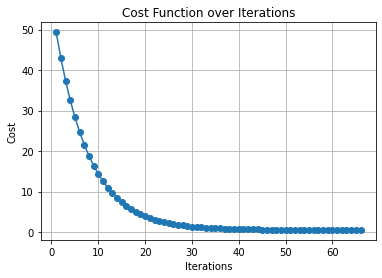

In [49]:
plt.plot(range(1, len(cost_list_batch) + 1), cost_list_batch, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

In [ ]:
# mini

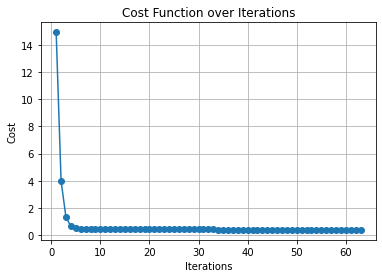

In [46]:
plt.plot(range(1, len(cost_list_batch) + 1), cost_list_batch, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

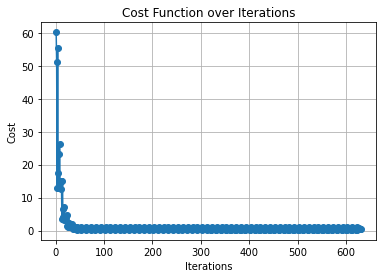

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

In [27]:
print(error)

[[-1.49807262]
 [ 0.52529933]
 [-1.09339823]
 [-0.28404945]
 [ 0.29405682]]


In [21]:
print(error)

[[-1.49807262]
 [ 0.52529933]
 [-1.09339823]
 [-0.28404945]
 [ 0.29405682]]


In [19]:
print(hx)

[array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[-0.30828988],
       [-0.91686964],
       [-0.70620741],
       [-1.05731112],
       [-0.40191753],
       [-1.12753186],
       [-0.61257976],
       [-0.58917284],
       [-0.75302124],
       [-0.44873136],
       [-0.28488297],
       [-0.09762766],
       [-0.87005581],
       [-0.19125531],
       [-0.07422074],
       [-0.144441

In [28]:
from sklearn.metrics import r2_score
#y_new=X@theta
r2_score(y,hx[-1])

0.9731203940075566

In [14]:
print(hx)

[array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[-0.30828988],
       [-0.91686964],
       [-0.70620741],
       [-1.05731112],
       [-0.40191753],
       [-1.12753186],
       [-0.61257976],
       [-0.58917284],
       [-0.75302124],
       [-0.44873136],
       [-0.28488297],
       [-0.09762766],
       [-0.87005581],
       [-0.19125531],
       [-0.07422074],
       [-0.144441

In [13]:
print(cost_list)

[49.34693877551021, 42.96137982976481, 37.41136489517327, 32.5875614778742, 28.39494344557049, 24.75091901332746, 21.583703685935145, 18.830906103809234, 16.438298933604298, 14.358750590091834, 12.551296744231207, 10.98033332614823, 9.61491512518522, 8.428146169448029, 7.396649875330941, 6.500108528968476, 5.720863027401626, 5.0435649943620495, 4.454874417357366, 3.943196849510052, 3.4984549990279024, 3.1118902066199623, 2.7758898999643784, 2.483837626082243, 2.2299827072561955, 2.0093269527160977, 1.817526194312864, 1.6508047064337066, 1.505880824231769, 1.3799022948496806, 1.2703900880565977, 1.1751895593685902, 1.0924280035661942, 1.0204777624136785, 0.9579241598023295, 0.9035376326402904, 0.8562495084676427, 0.8151309526159278, 0.7793746701712627, 0.7482790022698512, 0.7212341034230115, 0.697709927565098, 0.6772457861495691, 0.6594412725877249, 0.6439483742416315, 0.630464616577556, 0.6187271044197472, 0.6085073429173269, 0.599606736197361, 0.5918526750276032, 0.5850951364159, 0.57

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [15]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)


0.9673143861547023

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

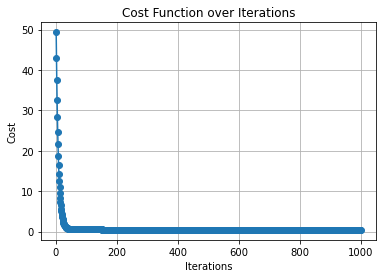

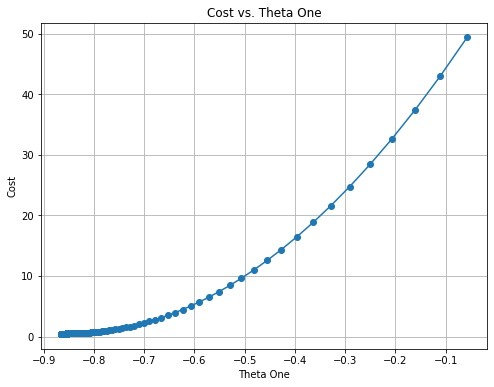

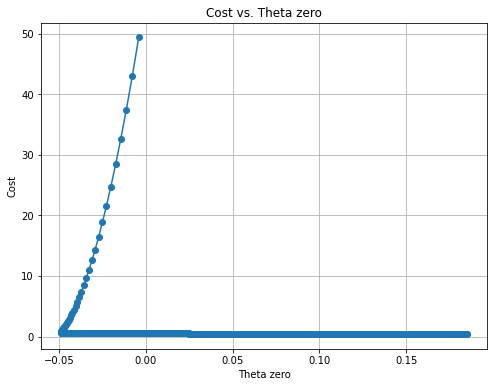

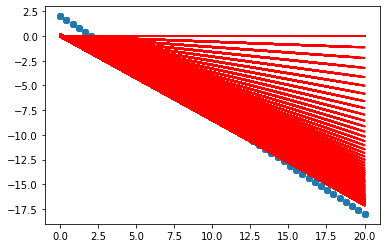

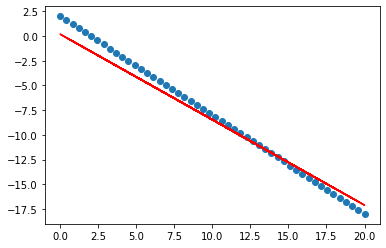

In [16]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


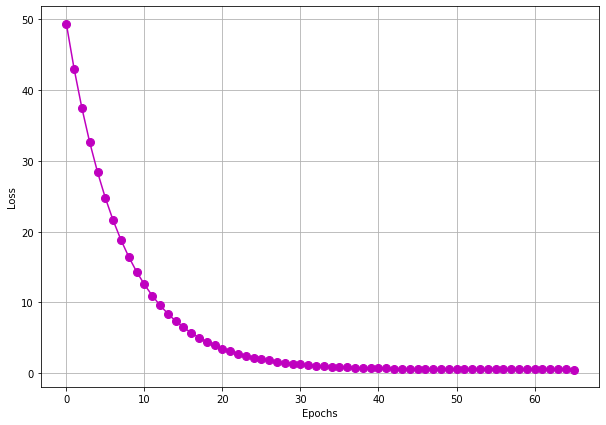

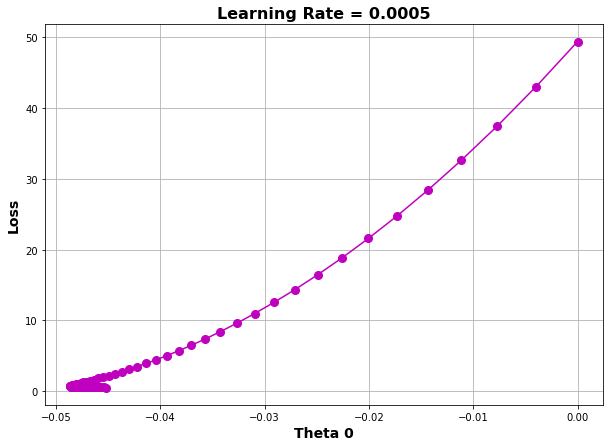

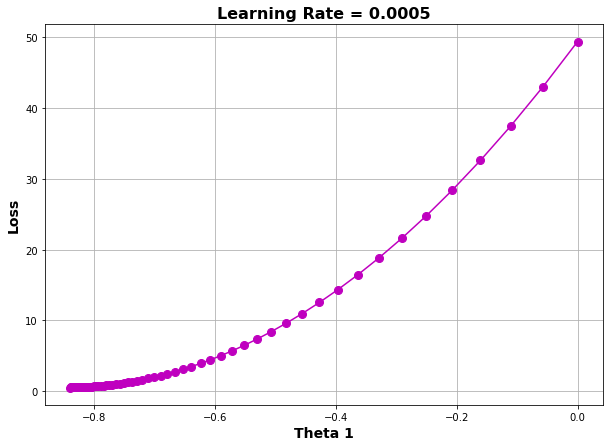

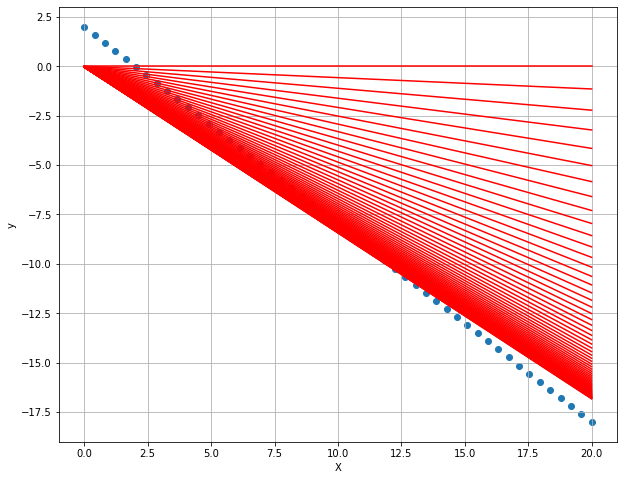

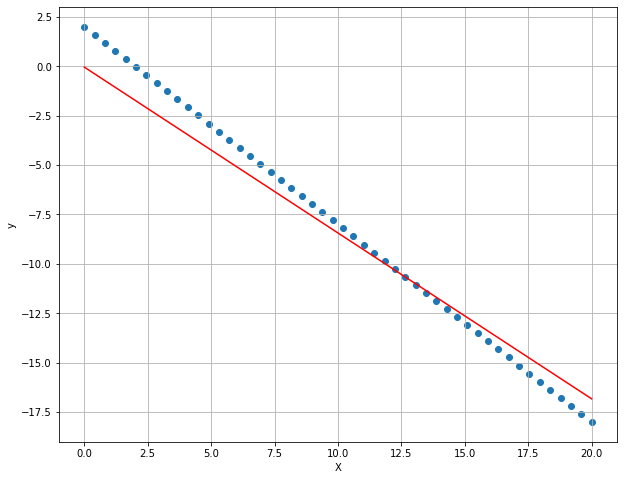

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [17]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
momentum=.5
alpha = 0.0005 #Learning rate
iterations = 1000 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= momentum_gradient_descent(X, y, theta, alpha,momentum, iterations)


In [18]:
print(cost_list)

[49.34693877551021, 42.96137982976481, 34.595052736755676, 26.568631719629952, 19.807866921908865, 14.49941210575867, 10.504813724795607, 7.580199607819249, 5.477951492918066, 3.9857756798541533, 2.935910596571484, 2.2018130773024107, 1.6907587448917583, 1.3360834757354345, 1.0904723578854072, 0.920641441207876, 0.8033228854465964, 0.7223227654128487, 0.6664060620143211, 0.6277958225126752, 0.6011175828787237, 0.5826615609693923, 0.5698692234866833, 0.5609771112745972, 0.5547703111307686, 0.5504120955588915, 0.5473263345799875, 0.5451164008883629, 0.5435092767848755, 0.5423170479710004, 0.5414103841082125, 0.5407002789757526, 0.540125479859367, 0.5396438346338474, 0.5392263361004525, 0.5388530230659667, 0.5385101594367254, 0.5381882929176449, 0.5378809190740177, 0.5375835620002029, 0.537293141686315, 0.5370075386788721, 0.5367252945090768, 0.5364454055484376, 0.5361671811550816, 0.5358901460605483, 0.5356139731997334, 0.535338437489579, 0.535063384023129, 0.5347887061831411, 0.53451433

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [19]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)

0.9756148772964639

r2_score: 0.9687892837396442


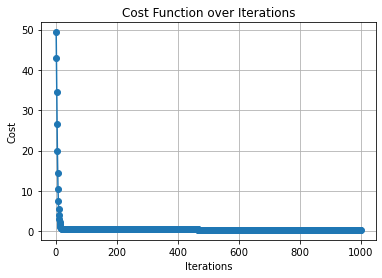

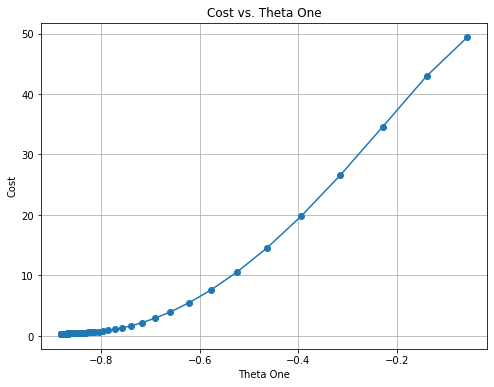

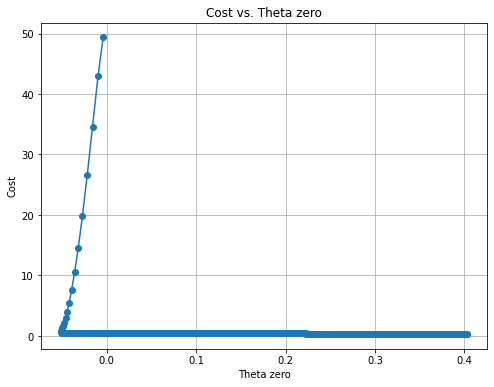

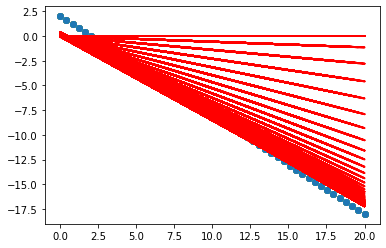

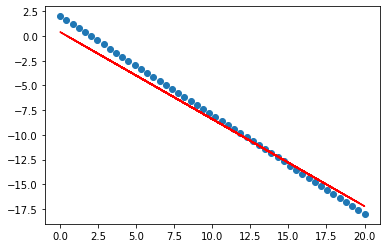

In [20]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


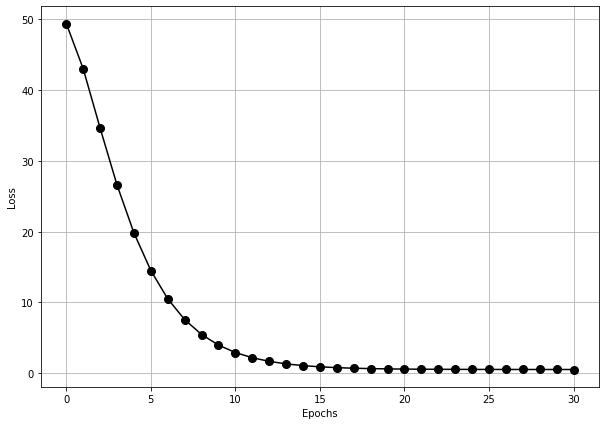

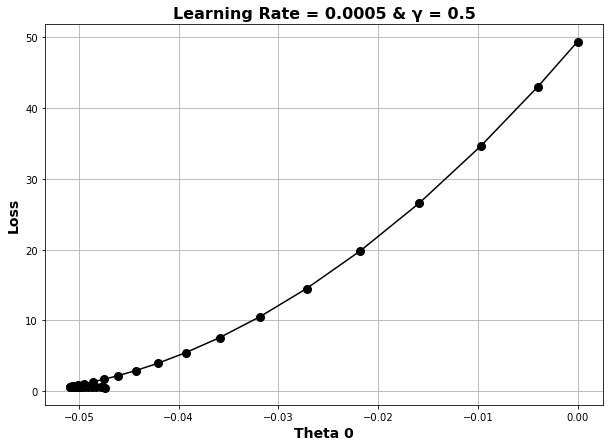

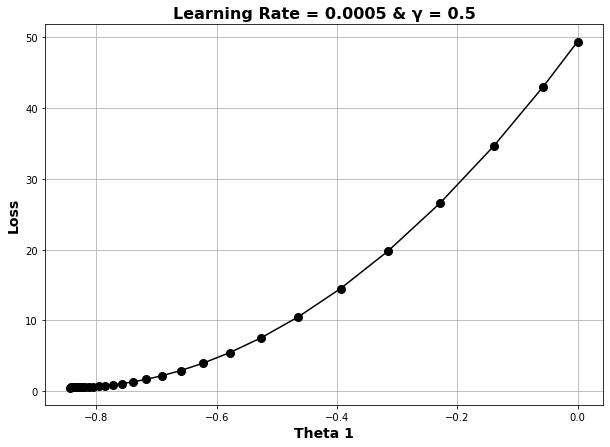

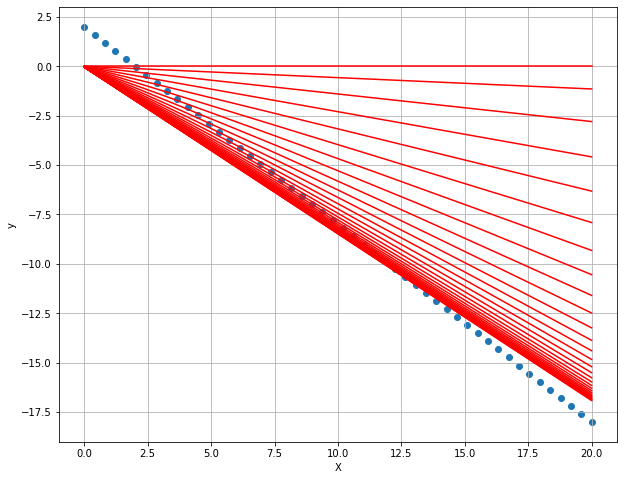

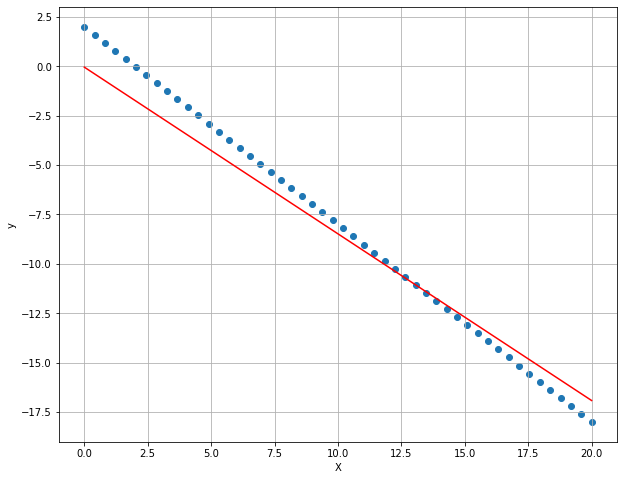

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [23]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
momentum=0.9
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= momentum_gradient_descent(X, y, theta, alpha,momentum, iterations)


In [24]:
print(cost_list)

[49.34693877551021, 42.96137982976481, 32.422565188137185, 20.647830716719692, 10.366099070733151, 3.458603756069805, 0.6396605814111606, 1.4935076677106307, 4.7902016727999515, 8.947664758768891, 12.495294214974715, 14.421627332352493, 14.340188592614634, 12.466118912995285, 9.445419624224812, 6.1079492197076934, 3.2210681582042877, 1.3060551788895567, 0.5517517589777838, 0.8287722571257361, 1.781567107368468, 2.960266156226282, 3.9514100472889426, 4.474729198776786, 4.427951926294554, 3.8781830765967324, 3.012176561654093, 2.065873855910728, 1.254950919267612, 0.723730650523361, 0.5218788420095629, 0.609490502218902, 0.8838829885656594, 1.2171963470593812, 1.4932410496451882, 1.6344202119487596, 1.6138051420295514, 1.4521307746415106, 1.2033335628279125, 0.9344621601525771, 0.7061059008948836, 0.558187828223755, 0.5036924196134078, 0.5304045027961584, 0.6086966474601845, 0.7022466152498873, 0.7784184875968012, 0.8157467950937698, 0.8071817839488327, 0.7590803353546756, 0.687005328091

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [25]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)


0.9814365928692326

r2_score 0.973589591111118


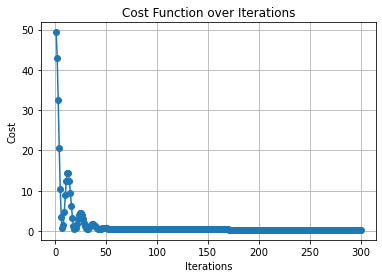

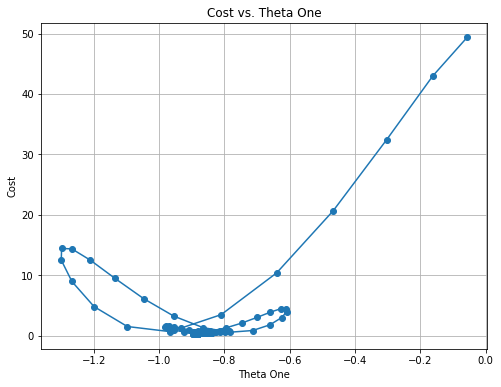

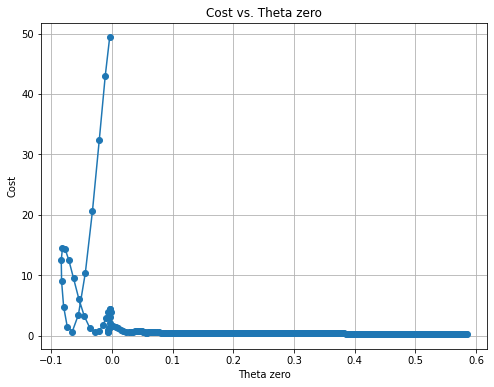

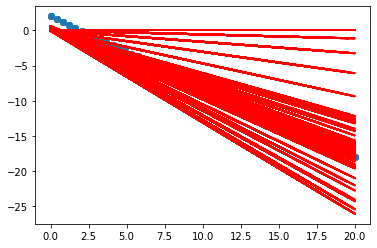

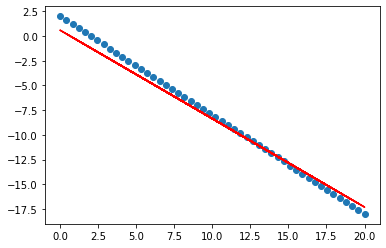

In [26]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


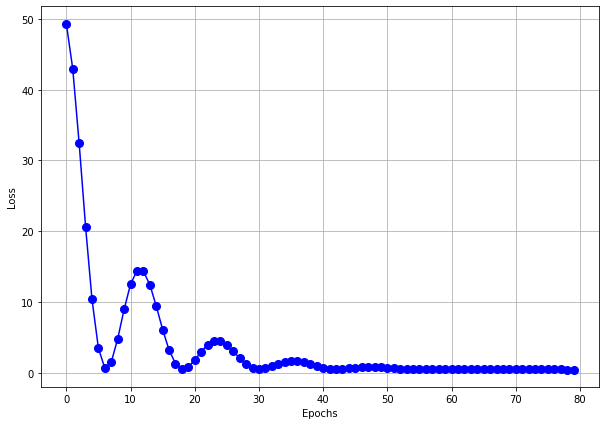

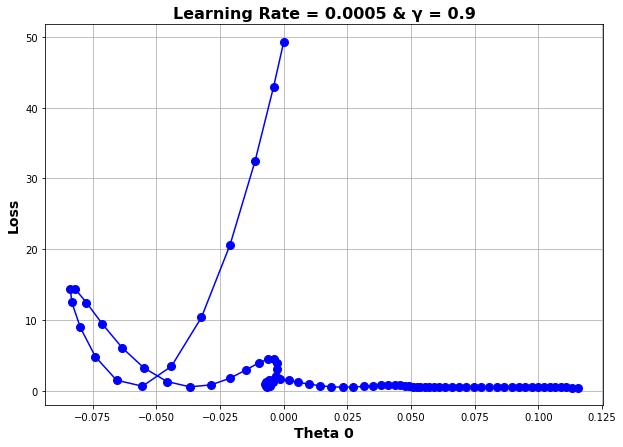

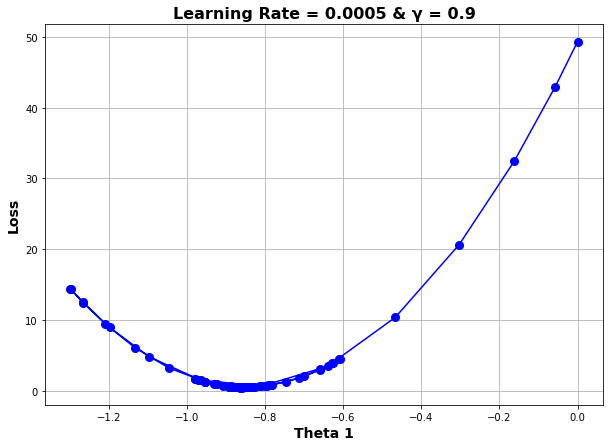

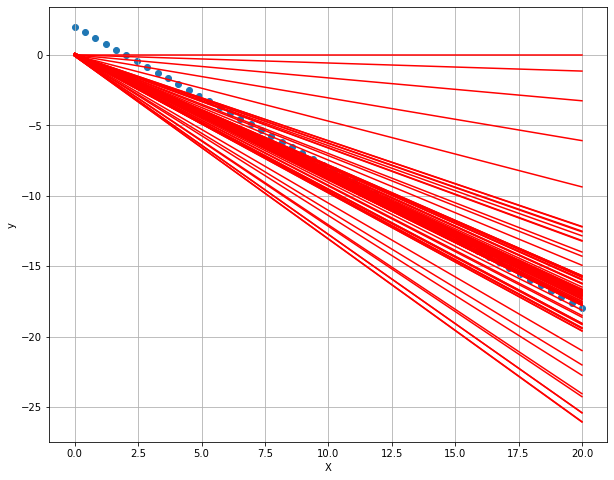

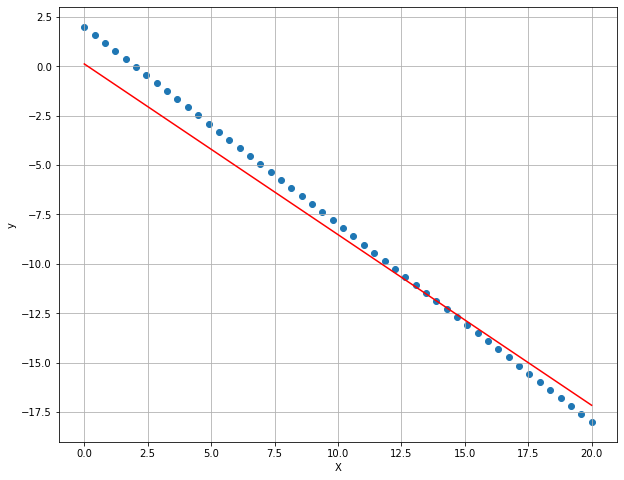

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [27]:


um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
momentum=0.89
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= momentum_gradient_descent(X, y, theta, alpha,momentum, iterations)



****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [28]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)
#################

0.9799709871715805

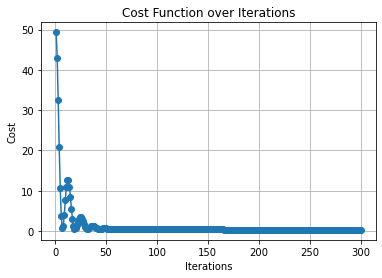

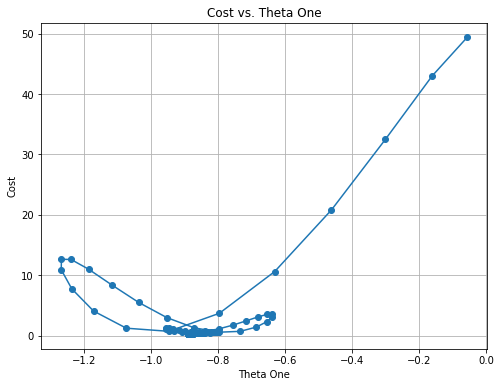

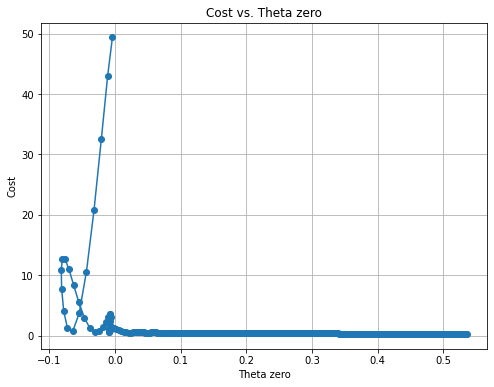

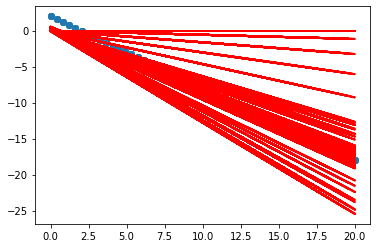

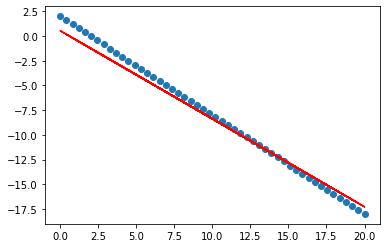

In [29]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


r2 score =  0.972435565060376


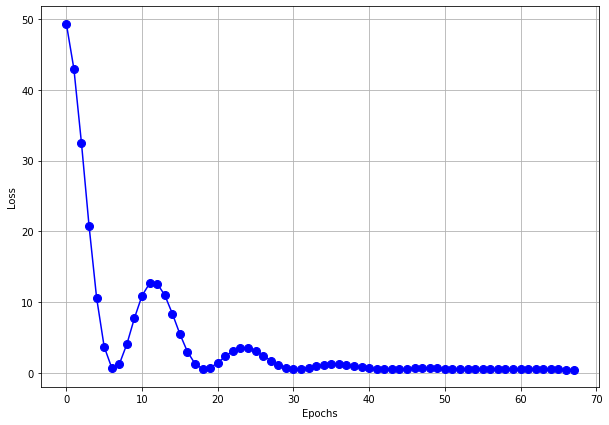

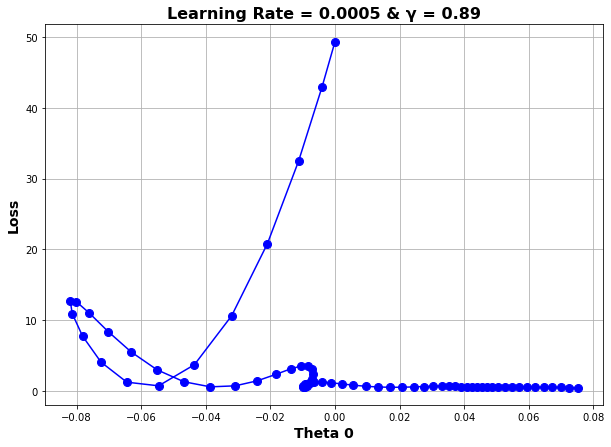

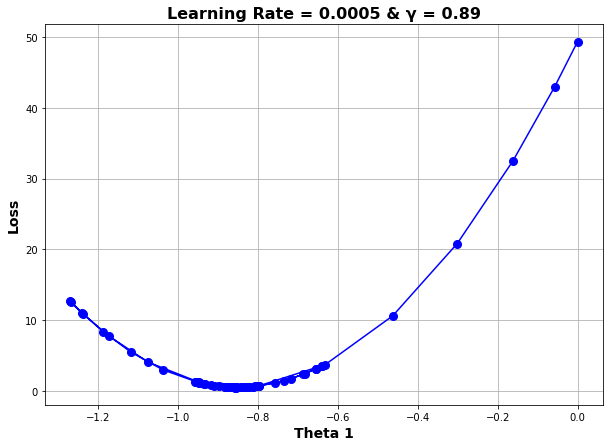

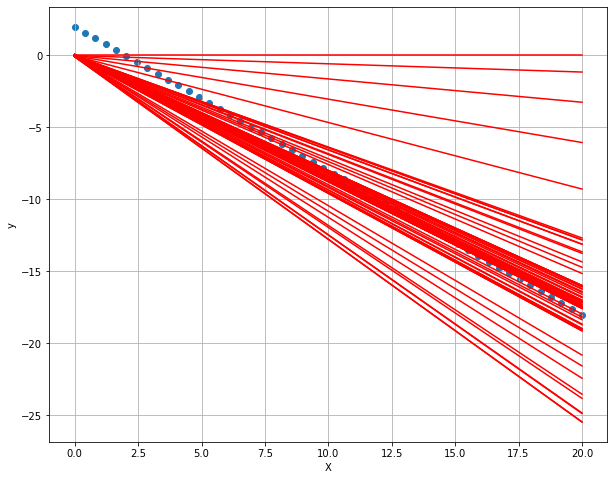

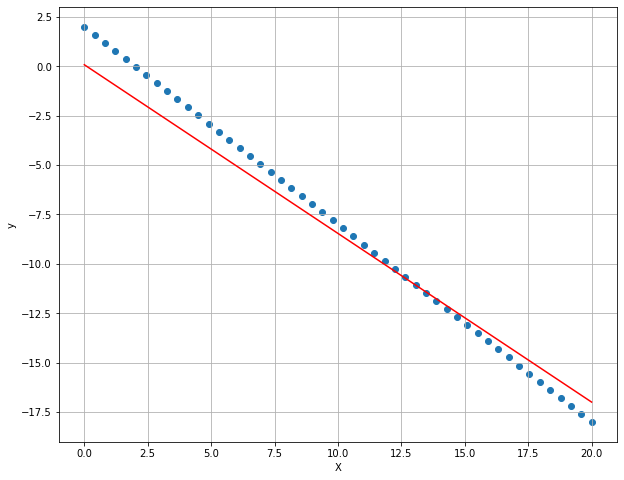

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [30]:
def momentum_gradient_descent(X, y, theta, alpha,momentum, iterations):
    m = len(y)
    cost_list = []
    velocity = np.zeros((X.shape[1], 1))
  #  gradient = np.zeros((2, 1))
    theta_0 = []
    theta_1 = []
    hx=[]
    for _ in range(iterations):
       # error = X.dot(theta) - y
        lookahead_theta = theta - momentum * velocity
        error=lookahead_theta.T.dot(X.T) - y
       # error=theta.T.dot(X.T) - y
        cost=1/(m*2)*(error.dot(error.T))
        lookahead_theta = theta - momentum * velocity

        gradient = (1 / m) * X.T.dot(error.T)
        ypredict=X@theta
        hx.append(ypredict)
        cost_list.append(cost[0,0])
        velocity = momentum * velocity + alpha * gradient #velocity
        # velocity = beta * velocity + (1 - beta) * gradient
        theta -= velocity
       # theta -= alpha * gradient
        theta_0.append(theta[0,0])
        theta_1.append(theta[1,0])
       
        if np.linalg.norm(gradient) < 0.3:
            print('reach to small gradient')
            break
        if cost<.2:
            print('reach to small cost')
            break
        
    return cost_list,error,theta,gradient,theta_0,theta_1,hx

In [34]:


um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
momentum=0.9
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= momentum_gradient_descent(X, y, theta, alpha,momentum, iterations)



##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [35]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)
#################

0.9814187489826038

r2_score 0.971103130756324


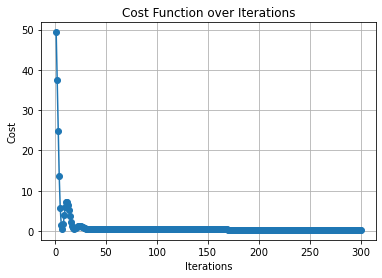

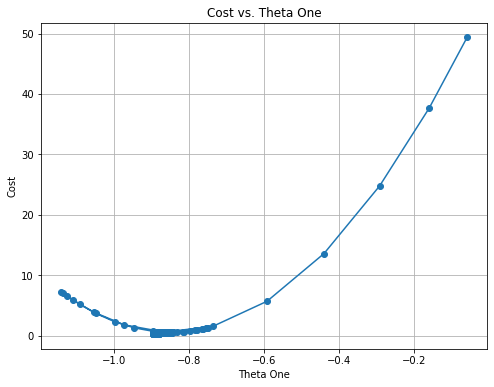

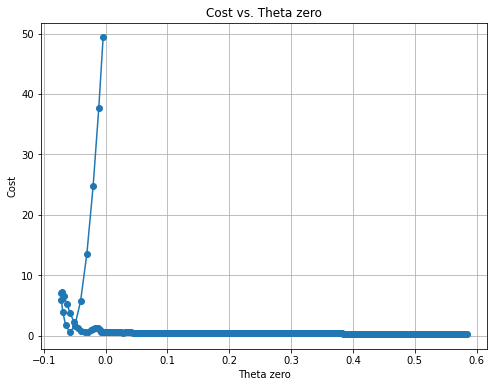

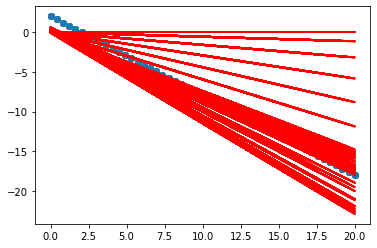

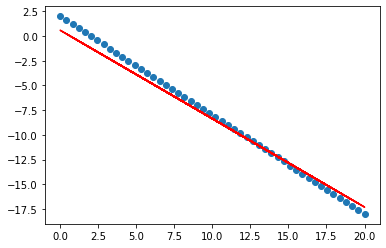

In [36]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


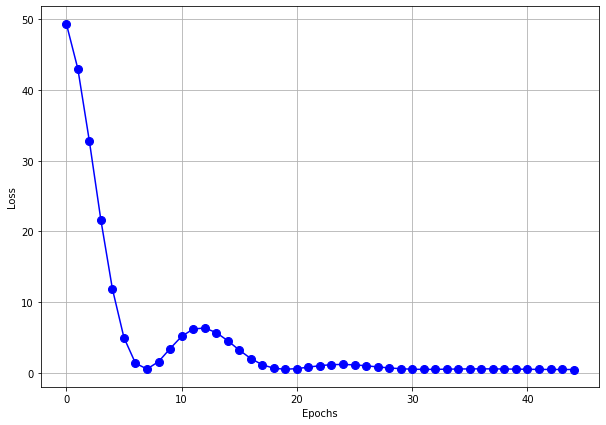

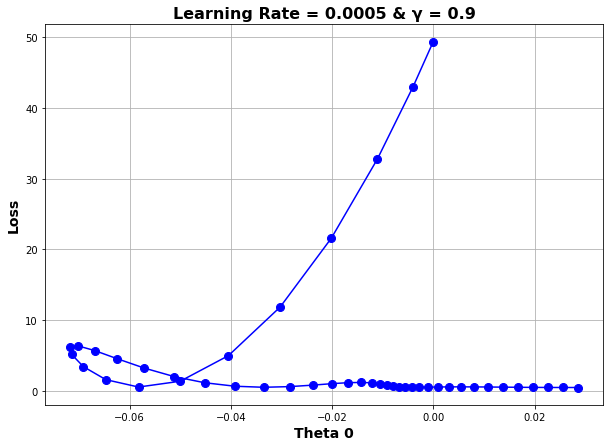

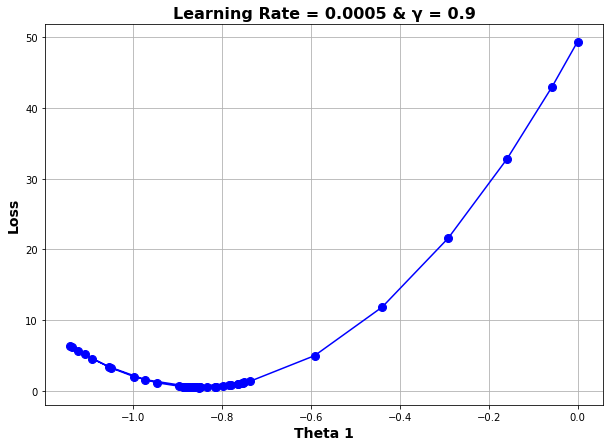

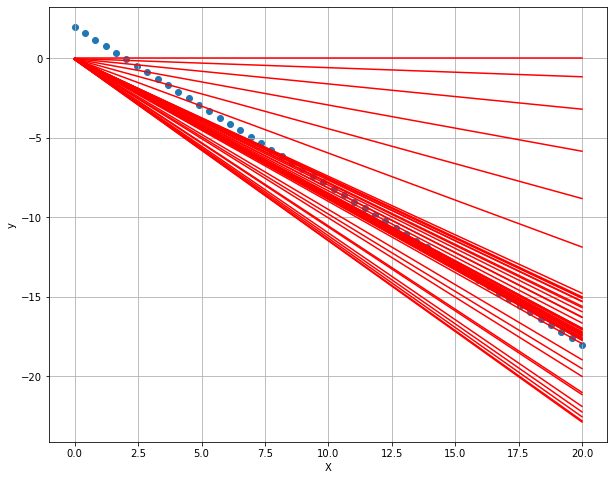

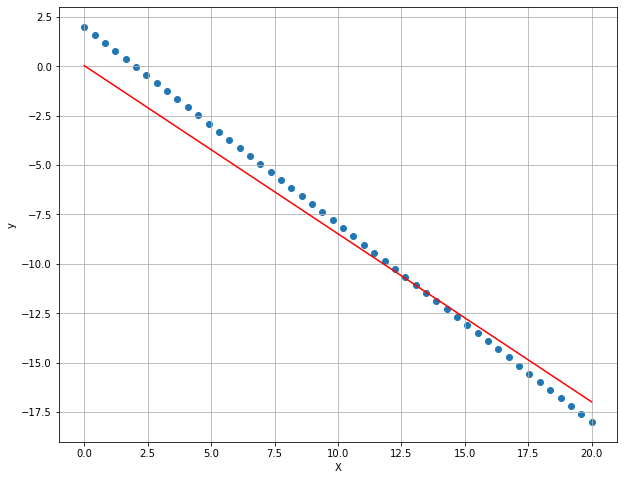

In [37]:


um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
momentum=0.89
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= momentum_gradient_descent(X, y, theta, alpha,momentum, iterations)



##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [38]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)
#################

0.9799551900838666

r2 score =  0.9699718983158406


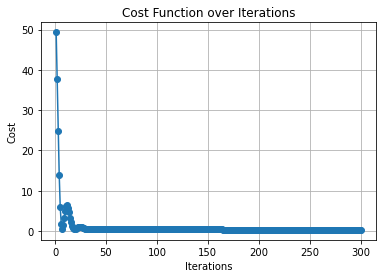

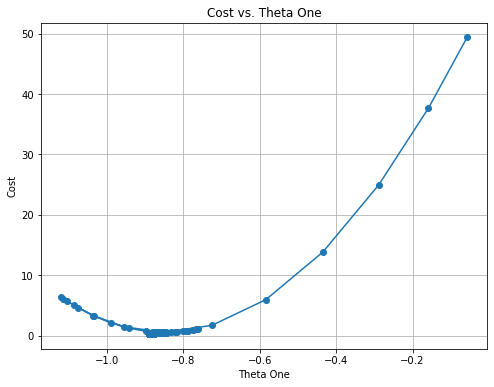

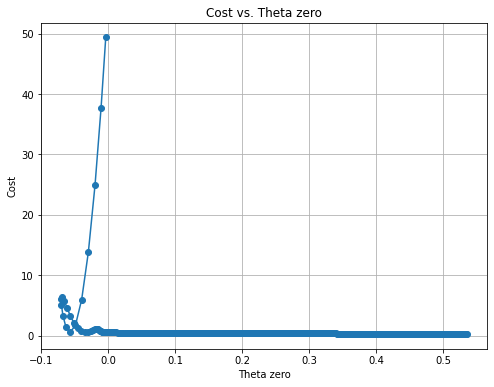

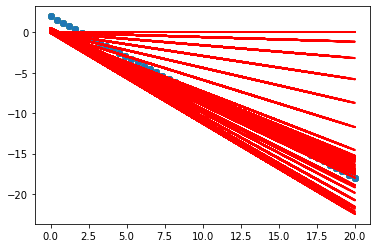

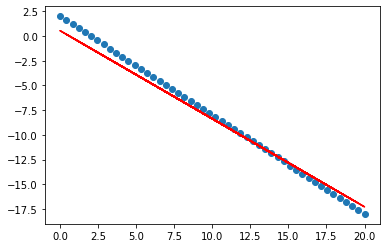

In [39]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


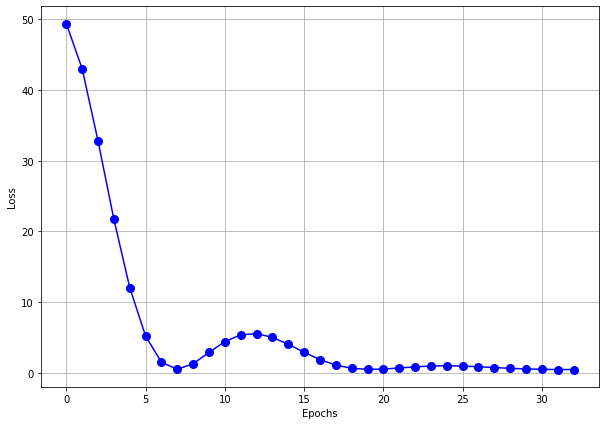

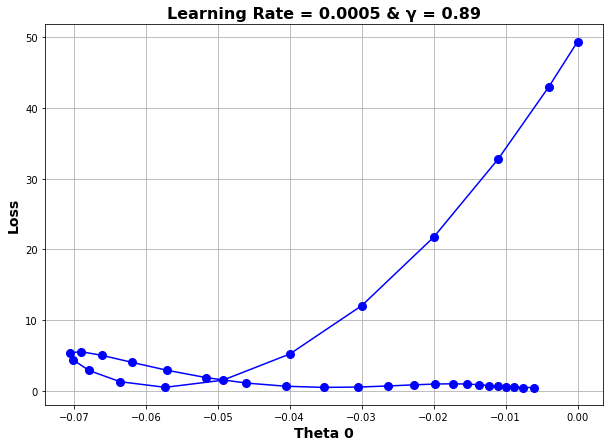

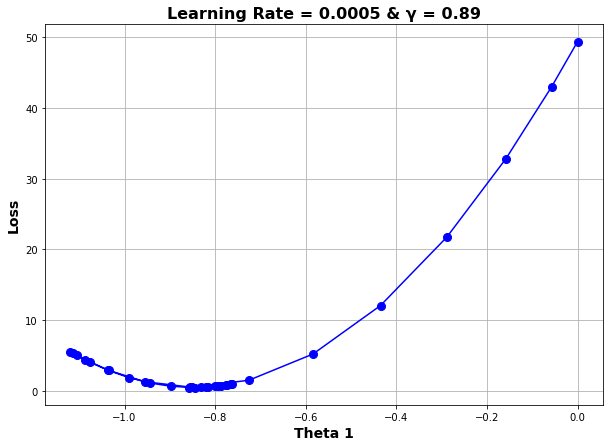

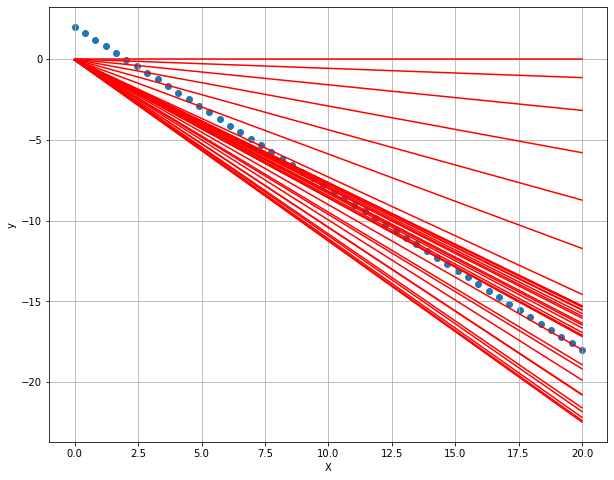

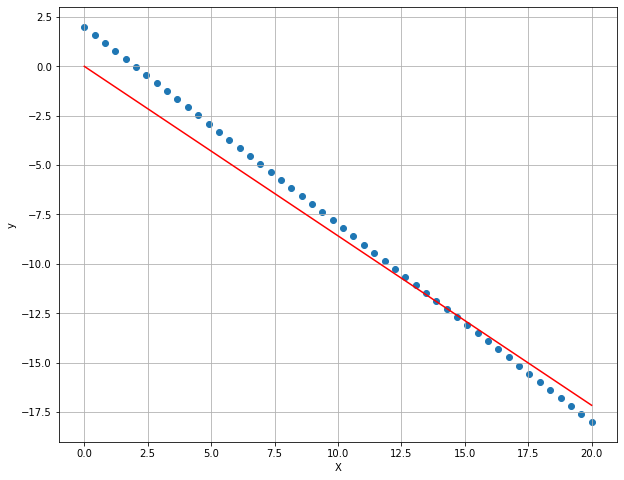